# TnT Lab Sessional Exam
#### Of:
Akanksha N Shenoy, 1905373

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head(n=10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
classess = df['class'].unique()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# normalising:
for col in df.columns[:-1]:
    df[col] =df[col] / df[col].max()

In [7]:
le = preprocessing.LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,0.645570,0.795455,0.202899,0.08,0
1,0.620253,0.681818,0.202899,0.08,0
2,0.594937,0.727273,0.188406,0.08,0
3,0.582278,0.704545,0.217391,0.08,0
4,0.632911,0.818182,0.202899,0.08,0


In [8]:
df['class'].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

In [9]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,sepal_length,sepal_width,petal_length,petal_width,class
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


In [10]:
x = df.drop(columns = ['class'])
y = df['class']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.3)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((105, 4), (105,), (45, 4), (45,))

In [12]:
algos = []
accuracy = []
recall = []
precision = []
f1Score = []

In [13]:
algo = "SVM"
model = SVC(kernel='poly', degree=3, C=1).fit(x_train, y_train)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy:', acc)
rec = recall_score(y_test, y_pred, average='weighted') * 100
print('Recall:', rec)
pre = precision_score(y_test, y_pred, average='weighted') * 100
print('Precision:', pre)
f1s = f1_score(y_test, y_pred, average='weighted') * 100
print('F score:', f1s)

print(classification_report(y_test, y_pred, target_names=classess))

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

SVM
[[20  0  0]
 [ 0 11  0]
 [ 0  1 13]] 


Accuracy: 97.77777777777777
Recall: 97.77777777777777
Precision: 97.96296296296295
F score: 97.78493469314725
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.97        45
   weighted avg       0.98      0.98      0.98        45



In [14]:
algo = "Adaboost"
model = AdaBoostClassifier().fit(x_train, y_train)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy:', acc)
rec = recall_score(y_test, y_pred, average='weighted') * 100
print('Recall:', rec)
pre = precision_score(y_test, y_pred, average='weighted') * 100
print('Precision:', pre)
f1s = f1_score(y_test, y_pred, average='weighted') * 100
print('F score:', f1s)

print(classification_report(y_test, y_pred, target_names=classess))

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

Adaboost
[[20  0  0]
 [ 0 10  1]
 [ 0  1 13]] 


Accuracy: 95.55555555555556
Recall: 95.55555555555556
Precision: 95.55555555555556
F score: 95.55555555555556
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [15]:
algo = "Naive Bayes"
model = GaussianNB().fit(x_train, y_train)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy:', acc)
rec = recall_score(y_test, y_pred, average='weighted') * 100
print('Recall:', rec)
pre = precision_score(y_test, y_pred, average='weighted') * 100
print('Precision:', pre)
f1s = f1_score(y_test, y_pred, average='weighted') * 100
print('F score:', f1s)

print(classification_report(y_test, y_pred, target_names=classess))

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

Naive Bayes
[[20  0  0]
 [ 0 10  1]
 [ 0  1 13]] 


Accuracy: 95.55555555555556
Recall: 95.55555555555556
Precision: 95.55555555555556
F score: 95.55555555555556
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [16]:
algo = "K Nearest Neighbour"
model = KNeighborsClassifier().fit(x_train, y_train)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy:', acc)
rec = recall_score(y_test, y_pred, average='weighted') * 100
print('Recall:', rec)
pre = precision_score(y_test, y_pred, average='weighted') * 100
print('Precision:', pre)
f1s = f1_score(y_test, y_pred, average='weighted') * 100
print('F score:', f1s)

print(classification_report(y_test, y_pred, target_names=classess))

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

K Nearest Neighbour
[[20  0  0]
 [ 0 10  1]
 [ 0  1 13]] 


Accuracy: 95.55555555555556
Recall: 95.55555555555556
Precision: 95.55555555555556
F score: 95.55555555555556
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



## Ans 2:

In [17]:
mx = 0
for i in range(len(algos)):
    print(algos[i], ':     ', accuracy[i],',  ', recall[i],',  ', precision[i],',  ', f1Score[i])
    if accuracy[i] > accuracy[mx]:
        mx = i

SVM :      97.77777777777777 ,   97.77777777777777 ,   97.96296296296295 ,   97.78493469314725
Adaboost :      95.55555555555556 ,   95.55555555555556 ,   95.55555555555556 ,   95.55555555555556
Naive Bayes :      95.55555555555556 ,   95.55555555555556 ,   95.55555555555556 ,   95.55555555555556
K Nearest Neighbour :      95.55555555555556 ,   95.55555555555556 ,   95.55555555555556 ,   95.55555555555556


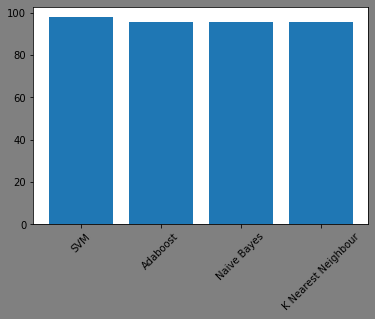

In [19]:
fig = plt.figure()
fig.patch.set_facecolor('grey')
plt.bar(algos, accuracy)
plt.xticks(rotation = 45) 
plt.show()

## Ans 4:

In [20]:
n = int(input())
f = 1
for i in range(2, n+1):
    f *= i
    
print('Factorial:', f)

5
Factorial: 120
